# Ted Data Analysis

In [1]:
from IPython.display import Image
Image(url='TED.gif') 

Founded in 1984 by Richard Saulman as a non profit organisation that aimed at bringing experts from the fields of Technology, Entertainment and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan and Bill Gates.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from scipy import stats 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### TED Dataset

In [3]:
df = pd.read_csv('ted_main.csv')

### Features Available

* **name**: The official name of the TED Talk. Includes the title and the speaker.
* **title**: the title of the talk.
* **description**: A blurb of what the talk is about.
* **main_speaker**: The first named speaker of the talk.
* **speaker_occupation**: The occupation of the main speaker.
* **num_speaker**: The number of speakers in the talk.
* **duration**: The duration of the talk in seconds.
* **event**: The TED/TEDx event where the talk took place.
* **film_data**: The Unix timestamp of the filming.
* **published_data**: The Unix timestamp for the publication of the talk on TED.com
* **comments**: The number of first level commnets made on the talk.
* **tags**: The themes associated with the talk.
* **languages**: The number of languages in which the talk is available.
* **ratings**: A stringfied dictionary of the various ratings given to the talk.
* **related_talks**: A list of dictionaries of recommended talks to watch next.
* **url**: The URL of talk.
* **views**: The number of views on the talk

In [4]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


Reorder the columns

In [5]:
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 
         'duration', 'event', 'film_date', 'published_date', 
         'comments', 'tags', 'languages', 'ratings', 'related_talks', 
         'url', 'views']]


Convert timestamps into a human readable format

In [6]:
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [7]:
df['published_date'].iloc[0]

'27-06-2006'

These represent all the talks that have ever been posted on the TED Platform until september 21, 2017.

In [8]:
len(df)

2550

### Most Viewed talks all the time

15 most viewed TED talks of all time. The number of views gives us a good idea of the popularity of the TED talk.

In [9]:
ted_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values(by = 'views', ascending = False)[:15]

In [10]:
ted_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,17-09-2009
837,The power of vulnerability,Brené Brown,31168150,06-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,10-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,27-02-2008
5,Why we do what we do,Tony Robbins,20685401,02-02-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,08-12-2015
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,27-10-2012


* Ken Robinson's talk on **Do Schools kill creativity?** is the most popular TED Talks of all time with 47.2 million views?
* Robinson's talk is closely followed by Amy Cuddy's talk on **Your Body Language May Shape Who You Are**.

In [11]:
sns.set_style('whitegrid')

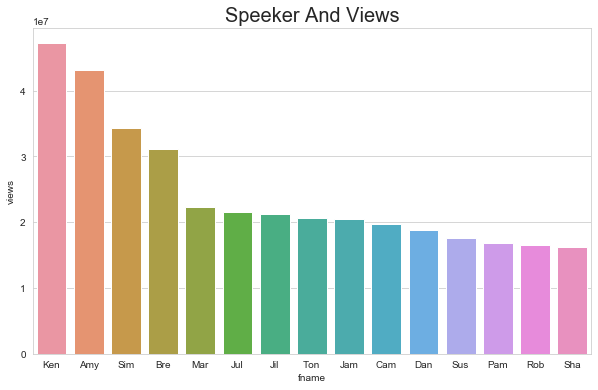

In [12]:
ted_talks['fname'] = ted_talks['main_speaker'].apply(lambda x : x[:3])
plt.figure(figsize = (10, 6))
plt.title('Speeker And Views', fontsize = 20)
sns.barplot(x = 'fname', y = 'views', data = ted_talks)

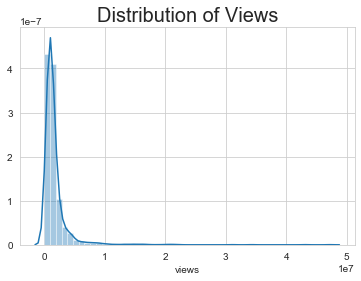

In [13]:
plt.title('Distribution of Views', fontsize = 20)
sns.distplot(df['views'])

In [14]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

The average number of views on TED Talks is **1.6 miilion** and the median number of views is **1.12 million**. This suggests a very high average level of popularity of TED Talks. 

### Comments 

In [15]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

* On average, there are **191.5 comments** on every TED Talk.
* There is a **huge standard deviation** associated with the comments.
* The minumum number of comments on a talk is **2** and maximum is **6404**. 

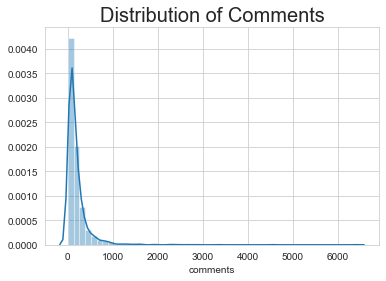

In [16]:
plt.title('Distribution of Comments', fontsize = 20)
sns.distplot(df['comments'])

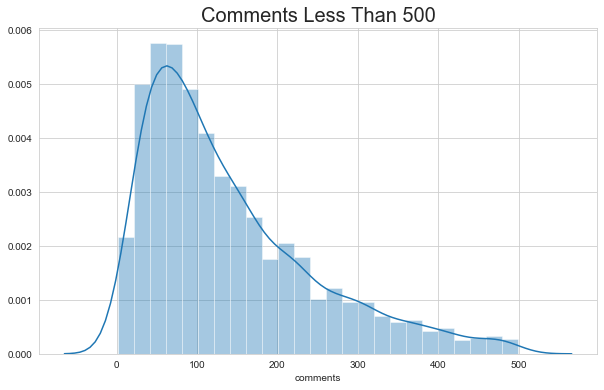

In [17]:
plt.figure(figsize = (10, 6))
plt.title('Comments Less Than 500', fontsize = 20)
sns.distplot(df[df['comments']<500]['comments'])

From the plot above, we can see that bulk of the talks have **fewer than 500 comments**. The mean obtained has been heavily influences by outliers.

If the number of views is correlated with the number of comments. We should think that this is the case as more popular videos tend to have more comments. Let's find out.

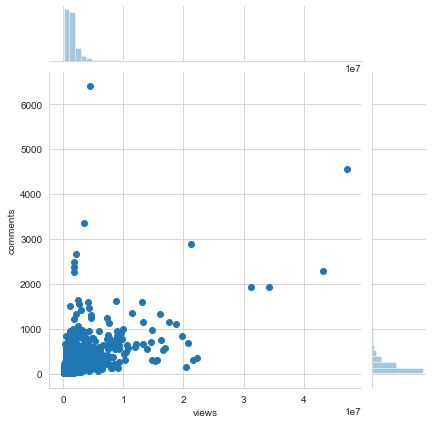

In [18]:
sns.jointplot(x = 'views', y = 'comments', data = df)

In [19]:
df[['views','comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


As the scatterplot and the correlation matrix show, the pearson coefficient is slightly **more than 0.5**. This result was pretty expected.
Let us now check the number of views and comments on the **10 most commented TED Talks of all the time**. 

In [20]:
df[['title', 'main_speaker', 'views', 'comments']].sort_values('comments', ascending = False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


As can be seen above, Richard Dawkins' talk on **Militant Atheism'** generated the greatest amount of discussion and opinions despite having significantly lesser views than Ken Robinson's talk, which is second in the list.

we will define a new feature discussion quotient which is simply the ratio of the number of comments to the number of views. We will then check which talks have the largest discussion quotient.

In [21]:
df['discussion_quo'] = df['comments']/df['views']

In [22]:
df[['title', 'main_speaker', 'views', 'comments', 'discussion_quo', 'film_date']].sort_values('discussion_quo', ascending = False).head(10)

,title,main_speaker,views,comments,discussion_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,02-12-2009
803,E-voting without fraud,David Bismark,543551,834,0.001534,14-07-2010
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,02-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,10-02-2010
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,03-03-2011
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,10-10-2010
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,08-12-2010
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,18-03-2014
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,11-02-2010
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,04-11-2009


The most discuss talk is **The case for same sex marriage**.

### Analysing TED Talks by the month and the year.

In [23]:
from IPython.display import Image
Image(url='giphy.gif') 

In [24]:
df['month'] = df['film_date'].apply(lambda x: sorted(x.split('-'))[0])

In [25]:
month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']

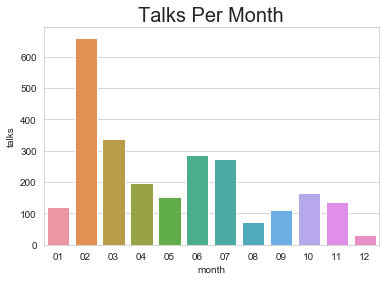

In [26]:
plt.title('Talks Per Month', fontsize = 20)
s = sns.barplot(x='month', y='talks', data = month_df)


**February** is the most popular month for TED confrences whereas **August** and **December** are the least popular. February's popularity is largely due to the fact that the official TED Conferences are held in February. Let us check the distribution for TEDx talks only.

In [27]:
dfx = df[df['event'].str.contains('TEDx')]

monthx = pd.DataFrame(dfx['month'].value_counts().reset_index())
monthx.columns = ['month', 'talks']

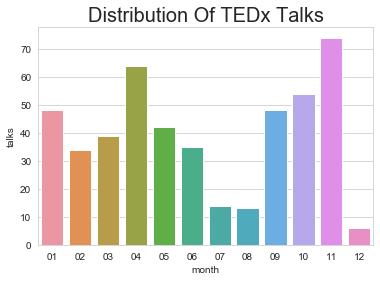

In [28]:
plt.title('Distribution Of TEDx Talks', fontsize = 20)
s = sns.barplot(x = 'month', y='talks', data = monthx)


As far as TEDx Talks are concerned, **November** is the most popular month.

In [29]:
df['year'] = df['film_date'].apply(lambda x: x.split('-')[2])
year_df = pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

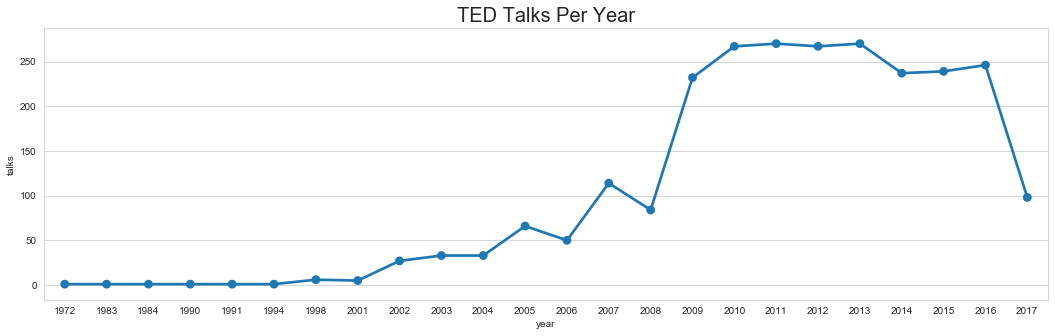

In [30]:
plt.figure(figsize = (18, 5))
plt.title('TED Talks Per Year', fontsize = 20)
s = sns.pointplot(x='year', y='talks', data = year_df)


* As expected, the number of TED Talks have gradually increased over the years since its inception in 1984.
* There was a sharp increase in the number if talks in 2009.
* The number of talks have been pretty much constant since 2009.

## TED Speakers

In [31]:
speaker_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending = False)
speaker_df.head(10)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


**Hans Rosling**, the Swiss Health Professor is clearly the most popular TED Speaker, with more than 9 appearances on the TED Forum. **Juan Enriquez** comes a close second with 7 appearances. Rives and Marco Tempest have graced the TED platform 6 times.

### TED Events

In [32]:
events_df = df[['title', 'event']].groupby('event').count().reset_index()
events_df.columns = ['event', 'talks']
events_df = events_df.sort_values('talks', ascending=False)
events_df.head(10)

,event,talks
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
98,TEDGlobal 2011,68
57,TED2007,68


**TED2014 had the most number of talks** followed by TED2009.

### TED Languages

In [33]:
df['languages'].describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

On average, a TED Talk is available in 27 different languages. The maximum number of languages a TED Talk is available in is a staggering 72.

In [34]:
df[df['languages'] == 72]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,discussion_quo,month,year
973,Matt Cutts: Try something new for 30 days,Try something new for 30 days,"Is there something you've always meant to do, ...",Matt Cutts,Technologist,1,207,TED2011,03-03-2011,01-07-2011,736,"['culture', 'success']",72,"[{'id': 10, 'name': 'Inspiring', 'count': 6171...","[{'id': 947, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/matt_cutts_try_somet...,8838874,0.000083,03,2011


The most translated TED Talk of all time is Matt Cutts' **Try Something New in 30 Days**.

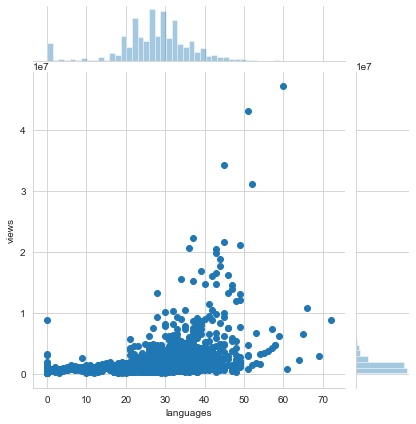

In [35]:
sns.jointplot(x='languages', y='views', data = df)

### TED Themes

In [36]:
from IPython.display import Image
Image(url='te.gif') 

In [37]:
import ast
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))

In [38]:
s = df.apply(lambda x : pd.Series(x['tags']), axis = 1).stack().reset_index(level = 1, drop = True)
s.name = 'theme'

In [39]:
theme_df = df.drop('tags', axis = 1).join(s)
theme_df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,languages,ratings,related_talks,url,views,discussion_quo,month,year,theme
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,02,2006,children
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,02,2006,creativity
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,02,2006,culture
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,02,2006,dance
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,02,2006,education


In [40]:
len(theme_df['theme'].value_counts())

416

TED defines a staggering 416 different categories for its talks.

In [41]:
top_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
top_themes.columns = ['theme', 'talks']
top_themes.head(10)

,theme,talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


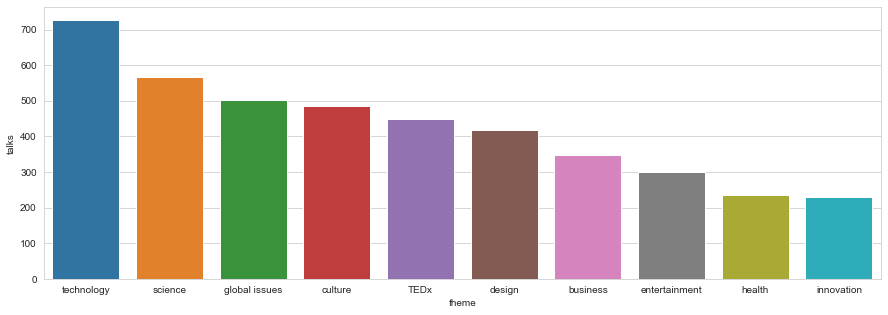

In [42]:
plt.figure(figsize = (15, 5))
sns.barplot(x = 'theme', y = 'talks', data = top_themes.head(10))


As may have been expected, Technology is the most popular topic for talks. The other two original factions, Design and Entertainment, also make it to the list of top 10 themes. Science and Global Issues are the second and the third most popular themes respectively.

### TED Ratings

In [43]:
df.iloc[0]['ratings']

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [44]:
df['ratings'] = df['ratings'].apply(lambda x: ast.literal_eval(x))

Lets find out which talks rated the funniest, the most beautiful, the most confusing anfd the most jaw droping if all the time.

In [45]:
df['funny'] = df['ratings'].apply(lambda x: x[0]['count'])

df['jawdrop'] = df['ratings'].apply(lambda x: x[-3]['count'])

df['beautiful'] = df['ratings'].apply(lambda x: x[2]['count'])

df['confusing'] = df['ratings'].apply(lambda x:x[2]['count'])
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,related_talks,url,views,discussion_quo,month,year,funny,jawdrop,beautiful,confusing
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,02,2006,19645,1174,6073,6073
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,...,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,02,2006,544,116,62,62
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,...,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,02,2006,964,230,183,183
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,...,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,02,2006,760,230,32,32
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,28-06-2006,...,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,02,2006,3202,2542,942,942


### Funniest Talks of all Time

In [46]:
df[['title', 'main_speaker', 'views', 'published_date', 'funny']].sort_values('funny', ascending = False)[:10]

,title,main_speaker,views,published_date,funny
837,The power of vulnerability,Brené Brown,31168150,23-12-2010,21444
0,Do schools kill creativity?,Ken Robinson,47227110,27-06-2006,19645
1030,How to live before you die,Steve Jobs,8744428,06-10-2011,17290
201,My stroke of insight,Jill Bolte Taylor,21190883,12-03-2008,14447
1129,The happy secret to better work,Shawn Achor,16209727,01-02-2012,11213
1940,The price of shame,Monica Lewinsky,11443190,21-03-2015,8668
2109,What makes a good life? Lessons from the longe...,Robert Waldinger,16601927,23-12-2015,8590
1747,Why good leaders make you feel safe,Simon Sinek,6803938,19-05-2014,8569
553,The thrilling potential of SixthSense technology,Pranav Mistry,16097077,16-11-2009,8416
176,Underwater astonishments,David Gallo,13926113,11-01-2008,8328


### Most Beautiful Talks of all Time

In [47]:
df[['title', 'main_speaker', 'views', 'published_date', 'beautiful']].sort_values('beautiful', ascending = False)[:10]

,title,main_speaker,views,published_date,beautiful
1346,Your body language may shape who you are,Amy Cuddy,43155405,01-10-2012,11111
201,My stroke of insight,Jill Bolte Taylor,21190883,12-03-2008,10464
1163,The power of introverts,Susan Cain,17629275,03-03-2012,10218
246,The transformative power of classical music,Benjamin Zander,9315483,25-06-2008,8108
837,The power of vulnerability,Brené Brown,31168150,23-12-2010,7942
972,Building a park in the sky,Robert Hammond,704205,30-06-2011,6685
0,Do schools kill creativity?,Ken Robinson,47227110,27-06-2006,6073
919,3 things I learned while my plane crashed,Ric Elias,6636475,22-04-2011,5834
176,Underwater astonishments,David Gallo,13926113,11-01-2008,5201
1776,How to speak so that people want to listen,Julian Treasure,21594632,27-06-2014,5167


### Most Jaw Dropping Talk of all Time

In [48]:
df[['title', 'main_speaker', 'views', 'published_date', 'jawdrop']].sort_values('jawdrop', ascending = False)[:10]

,title,main_speaker,views,published_date,jawdrop
4,The best stats you've ever seen,Hans Rosling,12005869,28-06-2006,2542
1163,The power of introverts,Susan Cain,17629275,03-03-2012,2467
381,Your elusive creative genius,Elizabeth Gilbert,13155478,09-02-2009,2093
1030,How to live before you die,Steve Jobs,8744428,06-10-2011,1368
0,Do schools kill creativity?,Ken Robinson,47227110,27-06-2006,1174
677,How great leaders inspire action,Simon Sinek,34309432,04-05-2010,1161
29,The surprising science of happiness,Dan Gilbert,14689301,26-09-2006,1047
117,New insights on poverty,Hans Rosling,3243784,25-06-2007,828
500,The puzzle of motivation,Dan Pink,18830983,24-08-2009,825
1170,Why you will fail to have a great career,Larry Smith,5917201,11-03-2012,752


### Most Confusing Talks of all Time

In [49]:
df[['title', 'main_speaker', 'views', 'published_date', 'confusing']].sort_values('confusing', ascending = False)[:10]

,title,main_speaker,views,published_date,confusing
1346,Your body language may shape who you are,Amy Cuddy,43155405,01-10-2012,11111
201,My stroke of insight,Jill Bolte Taylor,21190883,12-03-2008,10464
1163,The power of introverts,Susan Cain,17629275,03-03-2012,10218
246,The transformative power of classical music,Benjamin Zander,9315483,25-06-2008,8108
837,The power of vulnerability,Brené Brown,31168150,23-12-2010,7942
972,Building a park in the sky,Robert Hammond,704205,30-06-2011,6685
0,Do schools kill creativity?,Ken Robinson,47227110,27-06-2006,6073
919,3 things I learned while my plane crashed,Ric Elias,6636475,22-04-2011,5834
176,Underwater astonishments,David Gallo,13926113,11-01-2008,5201
1776,How to speak so that people want to listen,Julian Treasure,21594632,27-06-2014,5167


### Related Videos

 Every TED Talk is related to every other TED Talk by constructing a graph with all the talks as nodes and edges defined between two talks if one talk is on the list of recommended watches of the other. Considering the fact that TED Talks are extremely diverse, it would be interesting to see how dense or sparse our graph will be.

In [50]:
df['related_talks'] = df['related_talks'].apply(lambda x: ast.literal_eval(x))

In [51]:
s = df.apply(lambda x: pd.Series(x['related_talks']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'related'

In [52]:
related_df = df.drop('related_talks', axis=1).join(s)
related_df['related'] = related_df['related'].apply(lambda x: x['title'])

In [53]:
d = dict(related_df['title'].drop_duplicates())
d = {v: k for k, v in d.items()}

In [54]:
related_df['title'] = related_df['title'].apply(lambda x: d[x])
related_df['related'] = related_df['related'].apply(lambda x: d[x])

In [55]:
related_df = related_df[['title', 'related']]
related_df.head()

,title,related
0,0,692
0,0,1502
0,0,1991
0,0,715
0,0,1023


In [56]:
edges = list(zip(related_df['title'], related_df['related']))


In [57]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(edges)

C:\Users\Twinkle\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Twinkle\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


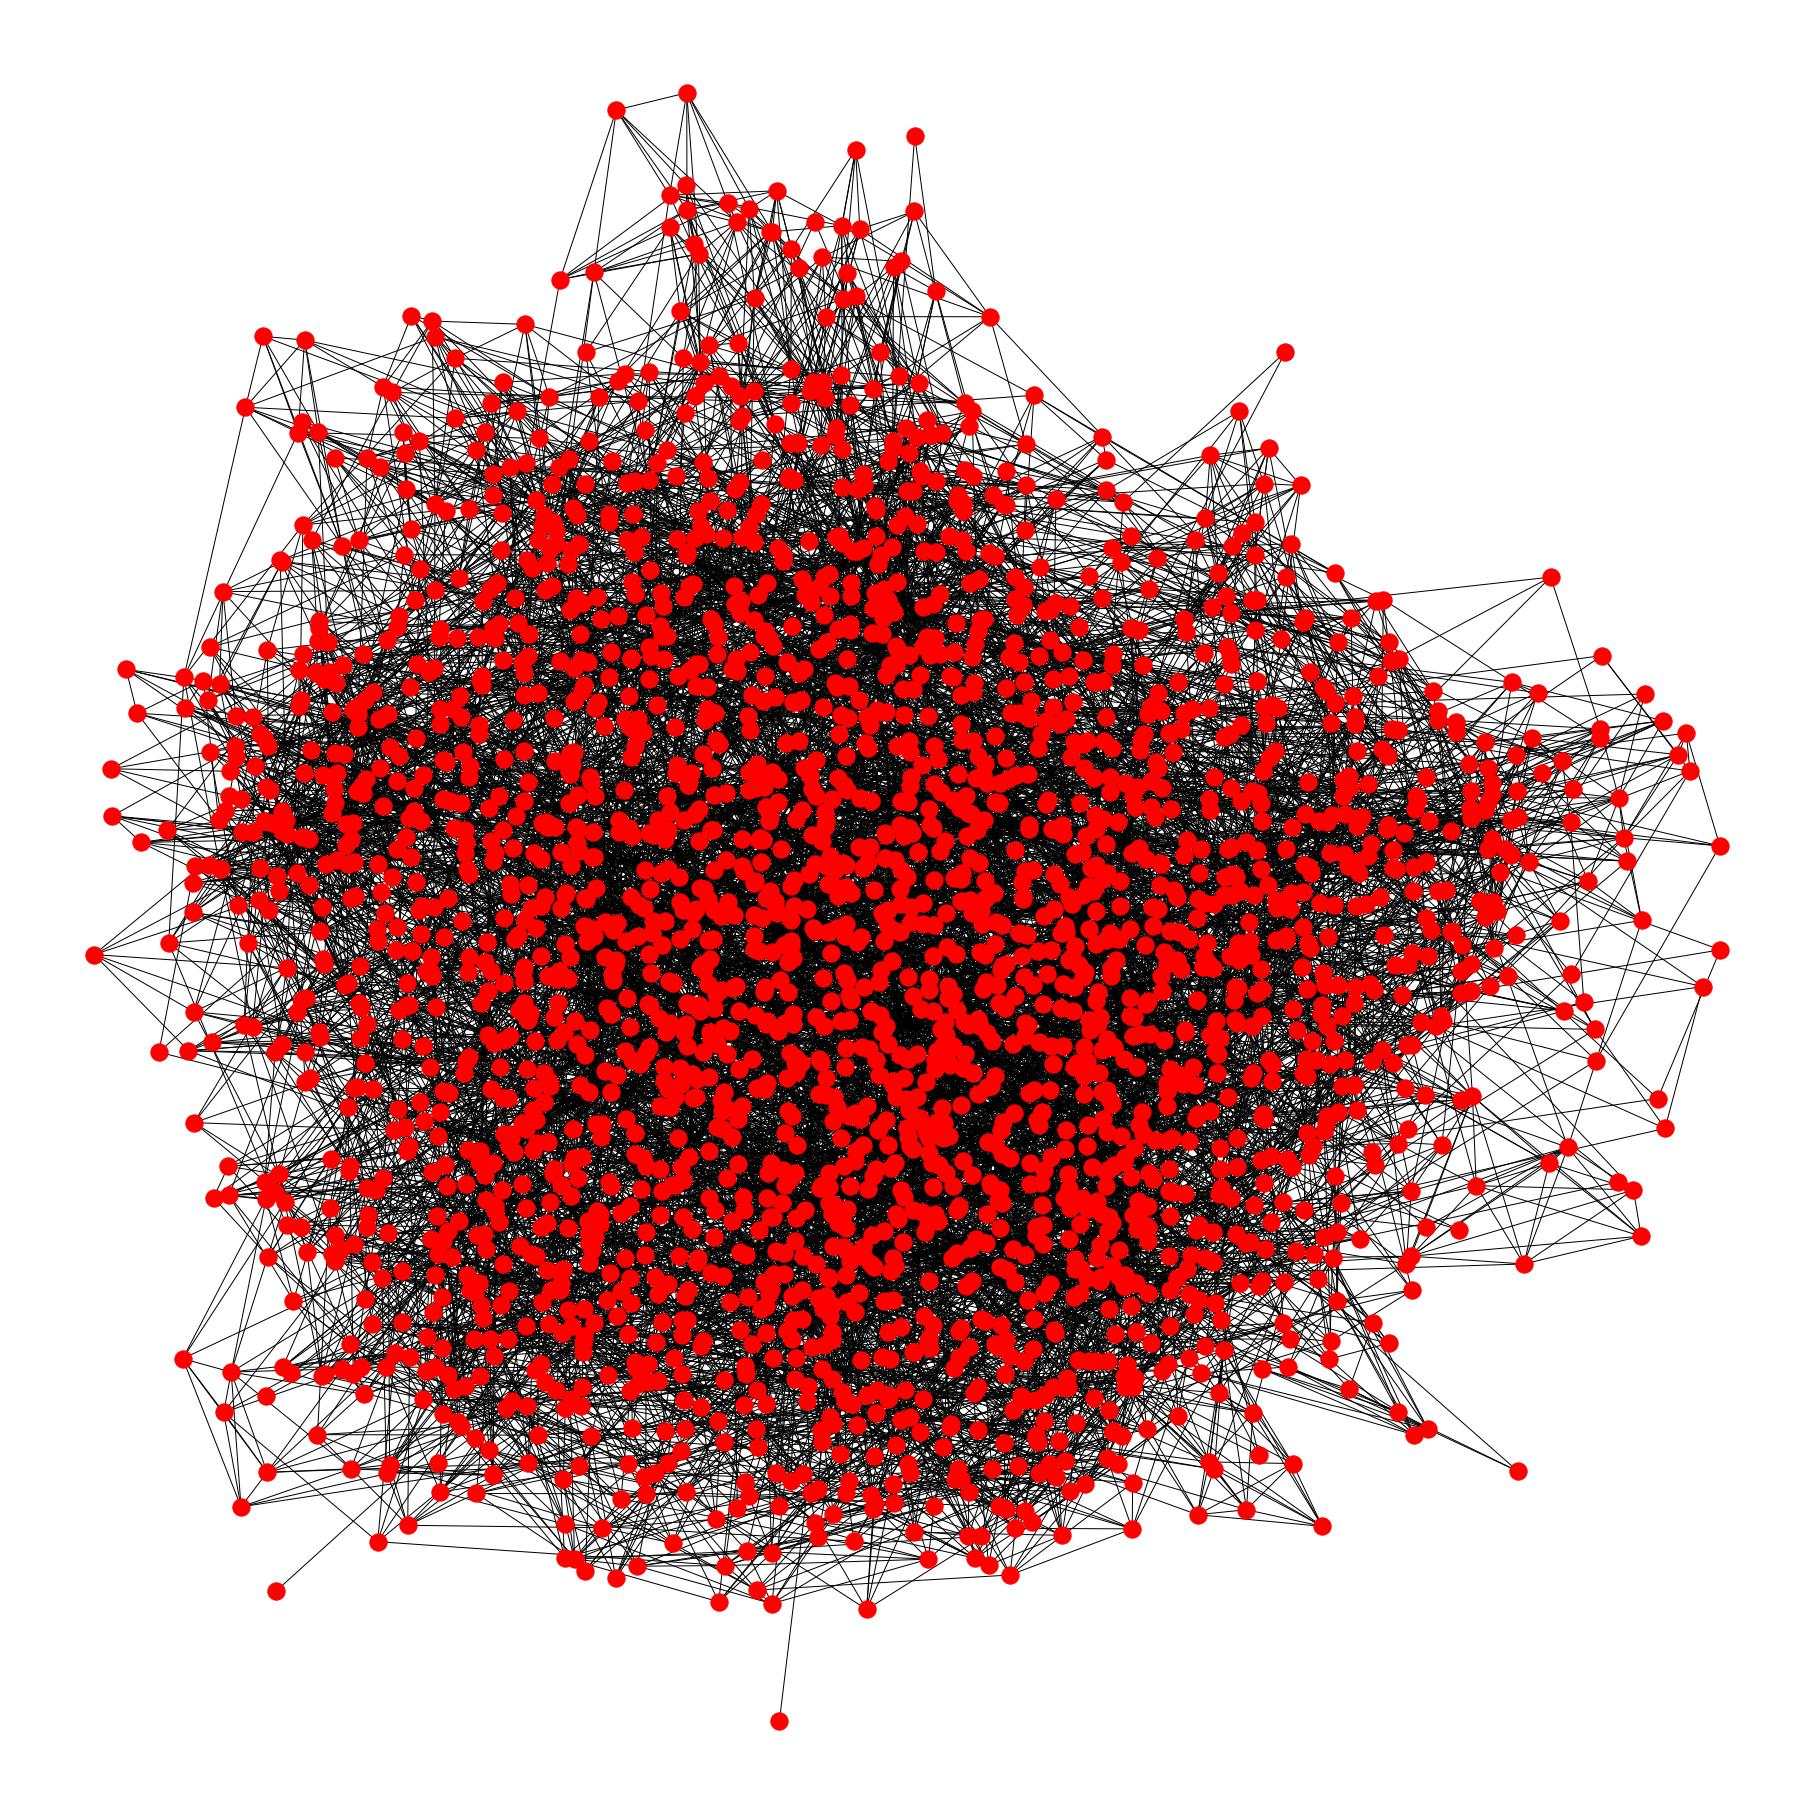

In [58]:
plt.figure(figsize=(25, 25))
nx.draw(G, with_labels=False)

The graph is reasonably dense. Every node is connected to atleast 3 other nodes. No matter how different the subjects of the talks are, the common theme of spreading ideas and inspiring people seems to be a adhesive force between them.

### Talk Duration and Word Counts

Performing analysis on the length of TED Talks.

In [59]:
#Convert to minutes

df['duration'] = df['duration']/60
df['duration'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

TED Talks on average are **13.7 minutes long**. The shortest TED Talk is **2.25 minutes long** whereas the longest talk is **87.6 minutes long**.

In [60]:
#Shortes Talk
df[df['duration'] == 2.25]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,related_talks,url,views,discussion_quo,month,year,funny,jawdrop,beautiful,confusing
239,Murray Gell-Mann: The ancestor of language,The ancestor of language,After speaking at TED2007 on elegance in physi...,Murray Gell-Mann,Physicist,1,2.25,TED2007,03-03-2007,11-06-2008,...,"[{'id': 161, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/murray_gell_mann_on_...,785293,0.000097,03,2007,78,11,104,104


In [61]:
#Longest Talk

df[df['duration'] ==87.6]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,related_talks,url,views,discussion_quo,month,year,funny,jawdrop,beautiful,confusing
640,"Douglas Adams: Parrots, the universe and every...","Parrots, the universe and everything","Blind river dolphins, reclusive lemurs, a parr...",Douglas Adams,"Author, satirist",1,87.6,University of California,16-05-2001,16-03-2010,...,"[{'id': 635, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/douglas_adams_parrot...,473220,0.000213,05,2001,293,4,290,290


The shortest talk was at TED2007 titled The ancestor of language by Murray Gell-Mann. The longest talk on TED.com, is not a TED Talk. It was a talk titled Parrots, the universe and everything delivered by Douglas Adams at the University of California in 2001.

Let us now check for any correlation between the popularity and the duration of a TED Talk. To make sure we only include TED Talks, we will consider only those talks which have a duration less than 25 minutes.

Text(336.9714285714286, 0.5, 'Views')

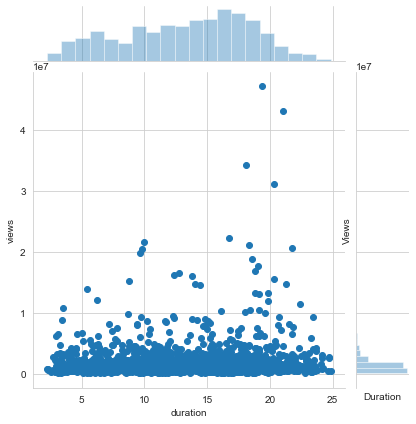

In [62]:
sns.jointplot(x = 'duration', y='views', data = df[df['duration']<25])
plt.xlabel('Duration')
plt.ylabel('Views')

There seems to be almost no correlation between these two quantities.

We look at transcripts to get an idea of word count. For this, we introduce our second dataset, the one which contains all transcripts.

In [63]:
df2 = pd.read_csv('transcripts.csv')
df2.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


Let us perform a join of the two dataframes on the url feature to include word counts for every talk.

In [64]:
df3 = pd.merge(left = df, right = df2, how = 'left',
              left_on='url', right_on= 'url')
df3.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,url,views,discussion_quo,month,year,funny,jawdrop,beautiful,confusing,transcript
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,19.400000,TED2006,25-02-2006,27-06-2006,...,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,02,2006,19645,1174,6073,6073,Good morning. How are you?(Laughter)It's been ...
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,16.283333,TED2006,25-02-2006,27-06-2006,...,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,02,2006,544,116,62,62,"Thank you so much, Chris. And it's truly a gre..."
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,21.433333,TED2006,24-02-2006,27-06-2006,...,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,02,2006,964,230,183,183,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,18.600000,TED2006,26-02-2006,27-06-2006,...,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,02,2006,760,230,32,32,If you're here today — and I'm very happy that...
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,19.833333,TED2006,22-02-2006,28-06-2006,...,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,02,2006,3202,2542,942,942,"About 10 years ago, I took on the task to teac..."


In [65]:
df3['transcript'] = df3['transcript'].fillna('')
df3['wc'] = df3['transcript'].apply(lambda x : len(x.split()))

In [66]:
df3['wc'].describe()

count    2553.000000
mean     1971.550725
std      1009.494329
min         0.000000
25%      1235.000000
50%      1983.000000
75%      2681.000000
max      9044.000000
Name: wc, dtype: float64

The average TED Talk has around 1971 words and there is a significantly large standard deviation of a 1009 words. The longest talk is more than 9044 words in length.

In [67]:
#number of words per minute
df3['wpm'] = df3['wc']/df3['duration']
df3['wpm'].describe()

count    2553.000000
mean      142.147752
std        39.635348
min         0.000000
25%       131.069182
50%       149.018182
75%       164.984615
max       247.364865
Name: wpm, dtype: float64

The average TED Speaker enunciates 142 words per minute. The fastest talker spoke a staggering 247 words a minute which is much higher than the average of 125-150 words per minute in English. Let us see who this is:

In [68]:
df3[df3['wpm']>245]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,discussion_quo,month,year,funny,jawdrop,beautiful,confusing,transcript,wc,wpm
441,Mae Jemison: Teach arts and sciences together,Teach arts and sciences together,"Mae Jemison is an astronaut, a doctor, an art ...",Mae Jemison,"Astronaut, engineer, entrepreneur, physician a...",1,14.8,TED2002,02-02-2002,05-05-2009,...,0.000133,02,2002,126,14,83,83,What I want to do today is to spend some time ...,3661,247.364865


The person is Mae Jemison with a talk on Teach arts and sciences together at the TED2002 conference.

### The TED Word Cloud

Most used words by TED Speakers.

In [69]:
corpus = ' '.join(df2['transcript'])
corpus = corpus.replace('.','. ')

(-0.5, 2399.5, 1999.5, -0.5)

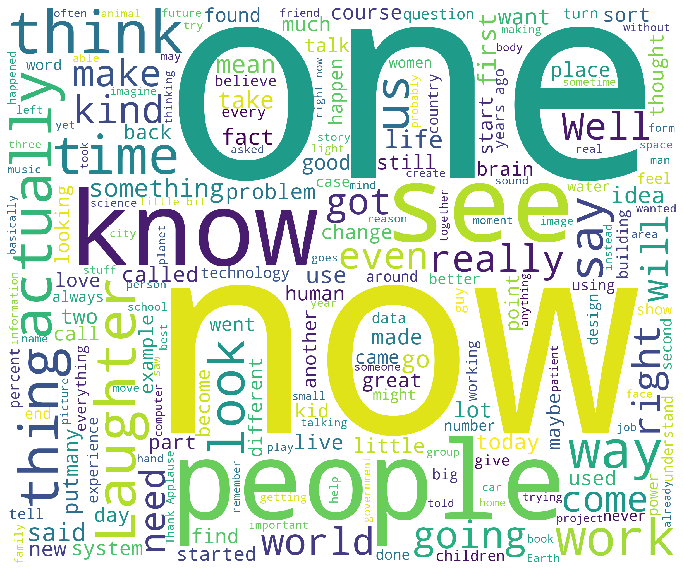

In [70]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')

The word **One** is the most popular word across the corpus of all TED. **Now**, **Think**, **See**, **People**, **Laughter** and **Know** are among the most popular words used in TED Speeches.